<a href="https://colab.research.google.com/github/nalymugwe/DataCquence/blob/main/Data_Cquence_Assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#add column names
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
print(boston.target.shape)

(506,)


In [9]:
#create a variable called PRICE that contains the prices.
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Relationship between CRIM and Price')

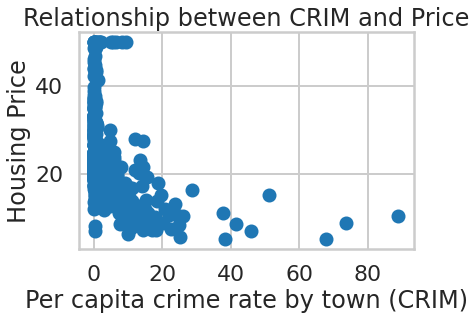

In [11]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

In [12]:
# Interpretation of the Per Capita crime rate by town vs Housing Price:
# There is a negative linear relationship between the crime rate and the housing price. Most of the data points show that an increase in the crime rate would reduce the cost of housing. 
# There is however an outlier where certain data points show a low (actually zero crime rate) crime rate with a low housing price and you would expect that a low housing price would be in regions of high crime rate as most crime infested areas have households with low income. Additionally, there's an area that has the highest housing price and it doesn't seem to be affected by the increasing crime rate.

Text(0.5, 1.0, 'Relationship between RM and Price')

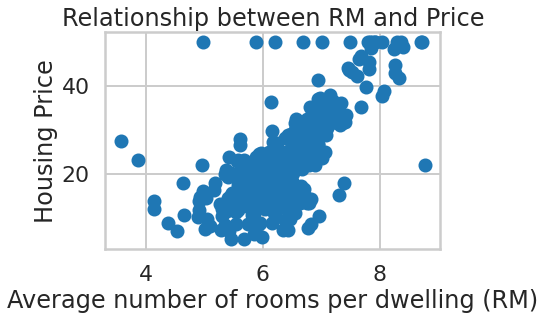

In [13]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

In [14]:
# Interpretation of the Average number of rooms per dwelling vs Housing price:
# There's a positive linear relationship between the average number of rooms per dwelling and the housing price. Most of the data points indicate that if the average number of rooms increases so does the cost of housing.   
# There is however an outlier where some data points show that a constant cost of housing despite the increase in the number of average rooms per dwelling. This shows that other factors probably influence this constant cost of housing. 

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

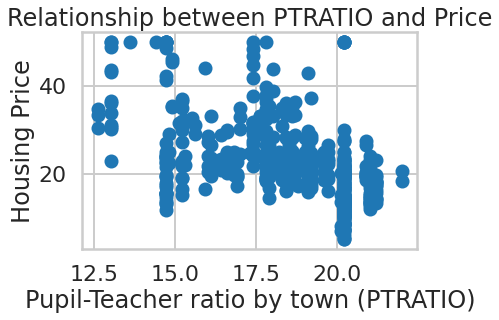

In [15]:
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-Teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

In [16]:
# Interpretation of the Pupil-Teacher ratio by town and Housing Price
# There's no correlation in between the Pupil-Teacher ratio and the housing price as there's no defined pattern in the plot. An observation to note that an increase in pupil-teacher ratio does not affect the cost of housing price. 

Text(0.5, 1.0, 'Relationship between INDUS and Price')

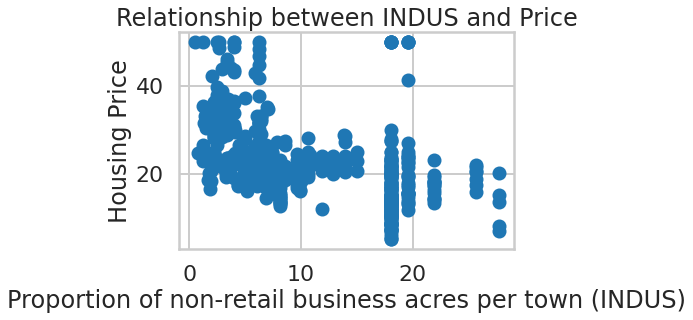

In [17]:
plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("Proportion of non-retail business acres per town (INDUS)")
plt.ylabel("Housing Price")
plt.title("Relationship between INDUS and Price")

In [18]:
# Interpretation of Proportion of non-retail business acres per town and Price
# There seems to be no correlation between these variables however it's important to note that an increase of non retail business acres does not affect the cost of housing.

Text(0.5, 1.0, 'Relationship between AGE and Price')

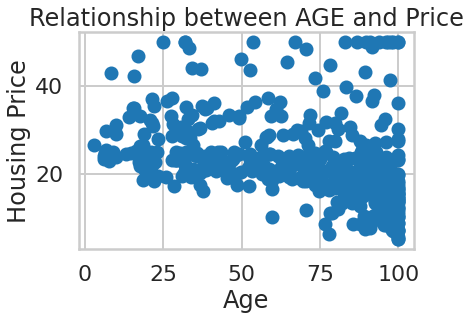

In [19]:
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Age")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

In [20]:
# Interpretation of Age and Price
# The age doesn't quite tell us anything significant as there's no clear pattern.

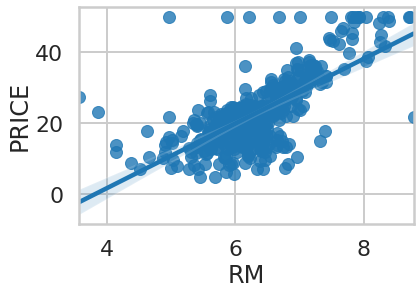

In [21]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

In [22]:
# The above scatter plot using seaborn confirms my earlier observation.

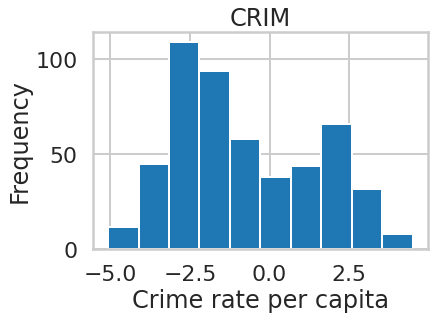

In [23]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

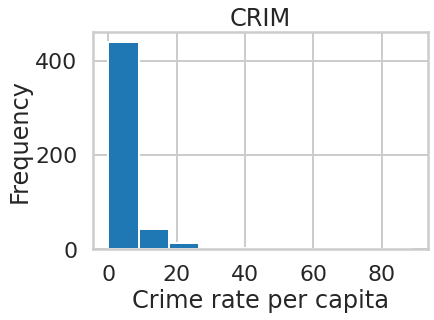

In [24]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

In [25]:
# The logarithmic values help us have a detailed view of the data. We can tell the range of the crime rate and its frequency as compared to where we can't read the data if the log plot is not included. When included, we are able to see the frequency of negative crime rate per capita and positive crime rate per capita. A negative crime rate per capita has a very high frequency.

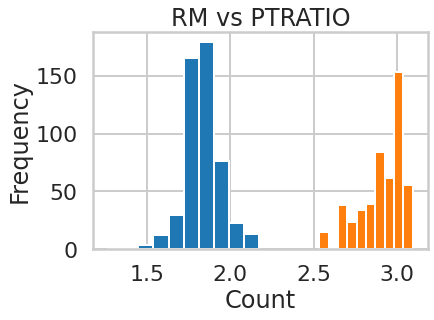

In [26]:
plt.hist(np.log(bos.RM))
plt.hist(np.log(bos.PTRATIO))
plt.title("RM vs PTRATIO")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

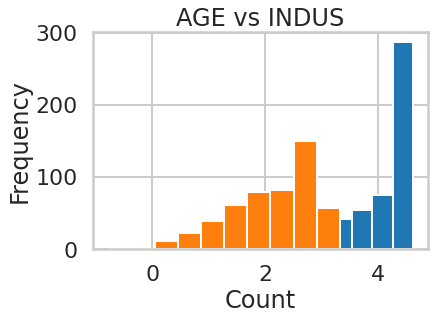

In [27]:
plt.hist(np.log(bos.AGE))
plt.hist(np.log(bos.INDUS))
plt.title("AGE vs INDUS")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           2.49e-74
Time:                        14:02:28   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Text(0.5, 1.0, 'Predicted vs Actual Housing Prices')

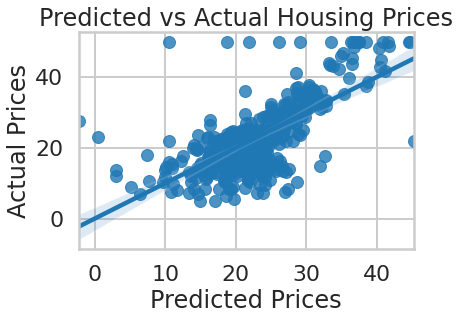

In [30]:
sns.regplot(y=bos.PRICE, x=m.fittedvalues, fit_reg = True)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Predicted vs Actual Housing Prices")

In [31]:
# The predicted housing prices are a true reflection of the actual prices seeing there's a positive linear relationship. There are however a few outliers where the actual price is much higher than the predicted price.

In [32]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
y= bos.PRICE

# This creates a LinearRegression object
lm = LinearRegression().fit(X, y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# You can change the model not to have the intercept by setting the parameter as false and this would introduce bias to your model meaning the predictive results will not be accurate.

In [35]:
# Yes, residuals should be normally distributed as it shows that your assumptions are valid meaning your confidence interval is also valid. 

In [36]:
# False, It doesn't need that assumption because it is not necessary that the response variable be normally distributed. We are usually interested in making inferences about the regression parameters.

In [37]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508978


In [38]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [39]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [40]:
# first five predicted prices
lm.predict(X)[0:5]


array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

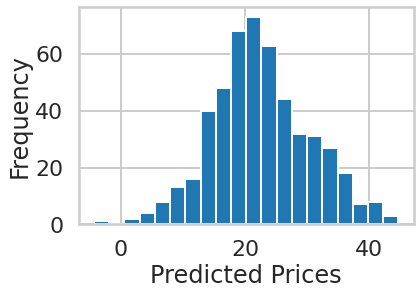

In [41]:
plt.hist(lm.predict(X), bins='auto')
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

In [42]:
# This is a normal distribution and the prediction prices seem to be centered around 20. The outliers here is the price that seems to be below 0 because realistically there are no negative prices.A reason this could be there is probably because of an error which is allowable seeing that the frequency is low, almost negligible.

Text(0.5, 1.0, 'Predicted vs Actual Housing Prices')

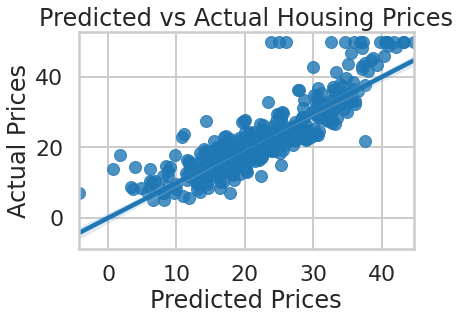

In [43]:
sns.regplot(y=bos.PRICE, x=lm.predict(X), fit_reg = True)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Predicted vs Actual Housing Prices")

In [44]:
# The predicted prices seem to agree with the actual prices.

In [45]:
# Statmodels is great for statitics i.e an indepth analysis of your data where as scikitlearn is great for prediction. What can you predict will happen in the near future.

In [46]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


In [47]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837064256


In [48]:
lr = LinearRegression()
lr.fit(bos.PTRATIO.values.reshape(-1,1), bos.PRICE)

print("Coefficient:", lr.coef_[0])
print("Intercept:", lr.intercept_)

Coefficient: -2.1571752960609643
Intercept: 62.34462747483265


In [49]:
# From the results above, there's a negative relationship betweeen Pupil-Teacher ratio and cost of housing unit meaning as the ratio of Pupil-Teacher increases, the cost of housing units decreases.
# The intercept value is at 62 meaning at a ratio of 0, the cost of the housing unit is predicted to be at 62.

In [50]:
r_squared = lr.score(X[["PTRATIO"]], bos.PRICE)
print("R^2 =", r_squared)

R^2 = 0.257847318009223


In [51]:
# The R squared value is low meaning that the regression model did not fit well into the data.

In [52]:
N = bos.PTRATIO.count()
K = 1

F = (r_squared / (1 - r_squared)) * ((N - K - 1) / K)
print("F-statistic =", F)

F-statistic = 175.10554287569548


In [53]:
lr2 = LinearRegression()
lr2.fit(X[['CRIM', "RM", "PTRATIO"]], bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
N2 = bos.PRICE.count()
K2 = 3
r_squared2 = lr2.score(X[['CRIM', 'RM', 'PTRATIO']], bos.PRICE)

F2 = (r_squared2 / (1 - r_squared2)) * ((N2 - K2 - 1) / K2)

print("F-statistic =", F2)

F-statistic = 245.16449030064626


In [55]:
print("R^2 =", r_squared2)

R^2 = 0.5943412940723471


In [56]:
# The R squared for the combined variables i.e per capita crime rate per town, average number of rooms per dwelling and pupil teacher ratio by town is a far better predictor of the cost of housing unit compared to when using the pupil teacher ratio on its own.

In [57]:
RSS_reduced = np.sum((bos.PRICE - lr2.predict(X[['CRIM', 'RM', 'PTRATIO']])) ** 2)

lr3 = LinearRegression()
lr3.fit(X[['CRIM', "RM", "PTRATIO", "INDUS", "AGE"]], bos.PRICE)

RSS_full = np.sum((bos.PRICE - lr3.predict(X[['CRIM', 'RM', 'PTRATIO', "INDUS", "AGE"]])) ** 2)

DF_reduced = bos.PRICE.count() - 3 - 1
DF_full = bos.PRICE.count() - 5 - 1

F = ((RSS_reduced - RSS_full)/(DF_reduced - DF_full)) / (RSS_full/DF_full)

print("F =", F)

F = 10.448846464928584


In [58]:
m1 = sm.OLS(bos.PRICE, X[['CRIM', 'RM', 'PTRATIO']], hasconst=True).fit()
m2 = sm.OLS(bos.PRICE, X[['CRIM', 'RM', 'PTRATIO', "INDUS", "AGE"]], hasconst=True).fit()
print("AIC with 'CRIM', 'RM', 'PTRATIO' =", m1.aic)
print("AIC with 'CRIM', 'RM', 'PTRATIO', 'INDUS', 'AGE' =", m2.aic)

AIC with 'CRIM', 'RM', 'PTRATIO' = 3230.648445108978
AIC with 'CRIM', 'RM', 'PTRATIO', 'INDUS', 'AGE' = 3213.226948597692


In [59]:
#Observation
# The AIC value is lower in the second model that has more variables (two more) showing that this gives a better fit to the model.

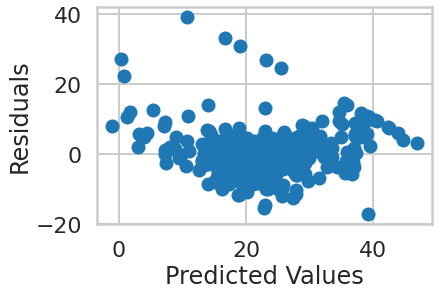

In [60]:
# Construct a fitted values versus residuals plot. 

predicted_values = lr2.predict(X[['CRIM', 'RM', 'PTRATIO']])

residuals = bos.PRICE - predicted_values

plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [61]:
#Observation.
# The plot doesn't conclude anything as there's no pattern to link it to make a conclusive observation.

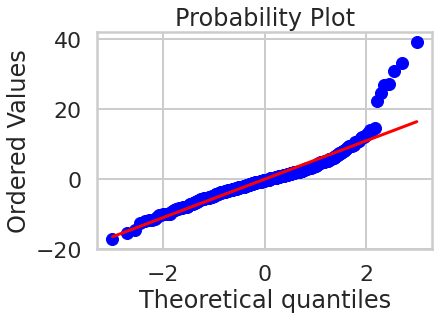

In [62]:
# Construct a quantile plot of the residuals. 

import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

In [63]:
#Observation
# The quantile plot of the residuals gives a more clearer pattern that shows a positive skew.
# The fitted values versus residuals plot shows the relationship between the predicted values and residuals. It shows outliers. 
# The quantile plot shows how the data is distributed. It does not highlight outliers but the plot is easier to read compared to the other plot of predictors vs residuals.
# Yes we have outliers in the data and this could be attributed to errors in the data or unique conditions i.e the pricing is determined by other costs not listed in the data.

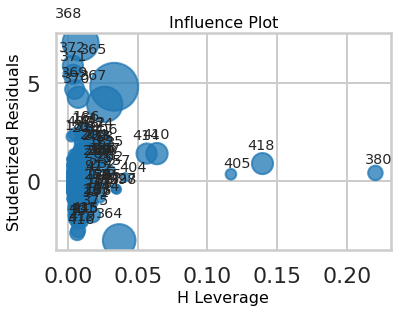

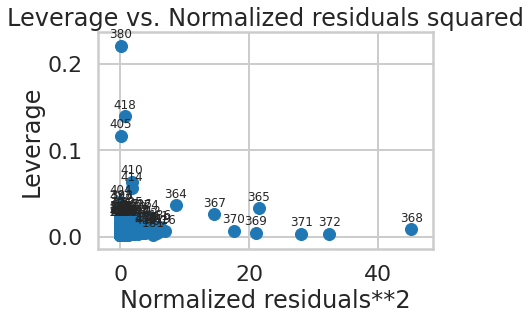

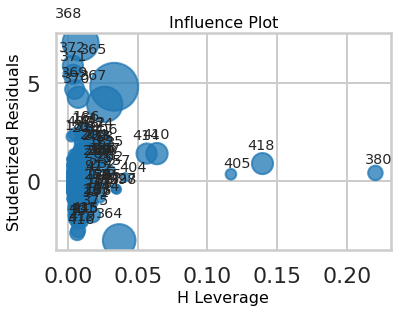

In [64]:
# Construct a leverage plot and identify outliers. 

from statsmodels.graphics.regressionplots import *

fitted = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()

plot_leverage_resid2(fitted)
influence_plot(fitted)

In [65]:
# Observation
# The high leveraged points are due to the outliers present in the independent variables.  

In [66]:
# Remove the outliers and high leverage points from your model and run the regression again. 

def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

no_outliers_CRIM = reject_outliers(X['CRIM'].values)
no_outliers_RM = reject_outliers(X['RM'].values)
no_outliers_PTRATIO = reject_outliers(X['PTRATIO'].values)

df = bos[(bos['CRIM'].isin(no_outliers_CRIM)) & (bos['RM'].isin(no_outliers_RM)) & (bos['PTRATIO'].isin(no_outliers_PTRATIO))]

lr4 = LinearRegression()
lr4.fit(df[['CRIM', "RM", "PTRATIO"]], df.PRICE)

r_2 = lr4.score(X[['CRIM', "RM", "PTRATIO"]], bos.PRICE)
print("R^2 =", r_2)

R^2 = 0.5220723007890395


In [67]:
#Observation
#The R squared is higher than our first model which shows that removing the outliers and high leveraged points has greatly improved the model.